In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Now let's try to ponder with the null values

In [9]:
df = df.drop(['last_review', 'reviews_per_month'], axis = 1)

In [11]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'longitude', 'latitude'], axis = 1)

In [12]:
df = df.drop(['number_of_reviews', 'calculated_host_listings_count'], axis = 1)

In [13]:
df.nunique()

neighbourhood_group      5
room_type                3
price                  674
minimum_nights         109
availability_365       366
dtype: int64

In [14]:
df.head(10)

,neighbourhood_group,room_type,price,minimum_nights,availability_365
0,Brooklyn,Private room,149,1,365
1,Manhattan,Entire home/apt,225,1,355
2,Manhattan,Private room,150,3,365
3,Brooklyn,Entire home/apt,89,1,194
4,Manhattan,Entire home/apt,80,10,0
5,Manhattan,Entire home/apt,200,3,129
6,Brooklyn,Private room,60,45,0
7,Manhattan,Private room,79,2,220
8,Manhattan,Private room,79,2,0
9,Manhattan,Entire home/apt,150,1,188


In [15]:
df.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'availability_365'],
      dtype='object')

In [16]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
df_Brooklyn = df[(df['neighbourhood_group'] == 'Brooklyn')]
df_Brooklyn.reset_index(drop=True, inplace=True)

In [26]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,availability_365
0,Brooklyn,Private room,149,1,365
1,Manhattan,Entire home/apt,225,1,355
2,Manhattan,Private room,150,3,365
3,Brooklyn,Entire home/apt,89,1,194
4,Manhattan,Entire home/apt,80,10,0


In [25]:
df_Manhattan = df[(df['neighbourhood_group'] == 'Manhattan')]
df_Brooklyn.reset_index(drop=True, inplace=True)

In [27]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,availability_365
0,Brooklyn,Private room,149,1,365
1,Manhattan,Entire home/apt,225,1,355
2,Manhattan,Private room,150,3,365
3,Brooklyn,Entire home/apt,89,1,194
4,Manhattan,Entire home/apt,80,10,0


In [21]:
df_Queens = df[(df['neighbourhood_group'] == 'Queens')]
df_Queens.reset_index(drop=True, inplace=True)
df_Queens.head(5)

,neighbourhood_group,room_type,price,minimum_nights,availability_365
0,Queens,Private room,130,3,215
1,Queens,Private room,70,30,324
2,Queens,Private room,140,2,1
3,Queens,Private room,79,30,126
4,Queens,Entire home/apt,350,8,365


In [22]:
df_StatenIsland = df[(df['neighbourhood_group'] == 'Staten Island')]
df_StatenIsland.reset_index(drop=True, inplace=True)
df_StatenIsland.head(5)

,neighbourhood_group,room_type,price,minimum_nights,availability_365
0,Staten Island,Private room,70,2,312
1,Staten Island,Private room,36,2,360
2,Staten Island,Private room,37,2,0
3,Staten Island,Private room,37,2,320
4,Staten Island,Private room,36,2,340


In [23]:
df_Bronx = df[(df['neighbourhood_group'] == 'Bronx')]
df_Bronx.reset_index(drop=True, inplace=True)
df_Bronx.head(5)

,neighbourhood_group,room_type,price,minimum_nights,availability_365
0,Bronx,Private room,40,1,353
1,Bronx,Private room,45,1,323
2,Bronx,Private room,90,2,349
3,Bronx,Entire home/apt,105,2,365
4,Bronx,Entire home/apt,90,30,346


In [28]:
df_Brooklyn.to_csv('Brooklyn.csv', index = False)
df_Manhattan.to_csv('Manhattan.csv', index = False)
df_Queens.to_csv('Queens.csv', index = False)
df_StatenIsland.to_csv('StatenIsland.csv', index = False)
df_Bronx.to_csv('Bronx.csv', index = False)

#Data Visualization

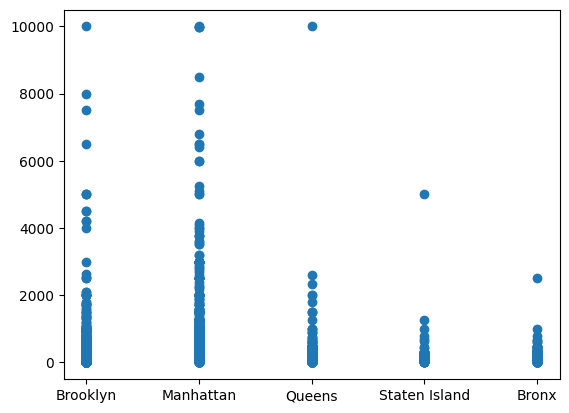

In [29]:
plt.scatter(df["neighbourhood_group"], df["price"])

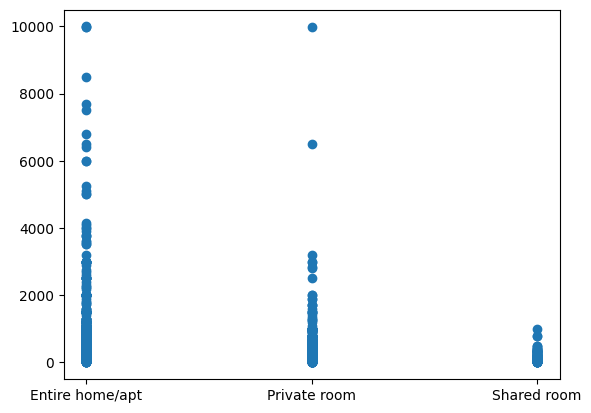

In [30]:
plt.scatter(df_Brooklyn["room_type"], df_Brooklyn["price"])

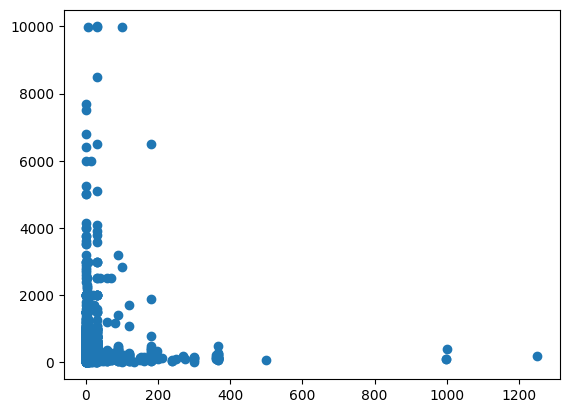

In [31]:
plt.scatter(df_Brooklyn["minimum_nights"], df_Brooklyn["price"])